In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv('strokeData.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [19]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
mean1 = df['bmi'].mean()
print(mean1)
df = df.fillna({'bmi': mean1})
#df = df.interpolate()

28.893236911794666


In [21]:
from matplotlib import colors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Create the subplots based on the number of categorical columns
fig = make_subplots(rows=2, cols=4, specs=[[{'type':'domain'}]*4]*2, vertical_spacing=0.1, horizontal_spacing=0.01)

# Loop through all the features and add the pie chart to the subplot
for i, feature in enumerate(categorical_columns):
    value_counts = df[feature].value_counts()
    labels = value_counts.index.tolist()
    values = value_counts.values.tolist()

    # Define color map based on purple color
    cmap = colors.LinearSegmentedColormap.from_list("Purple", ["Purple", "white"])
    norm = colors.Normalize(vmin=0, vmax=len(labels))
    color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]

    pie_chart = go.Pie(
        labels=labels,
        values=values,
        hole=0.6,
        marker=dict(colors=color_list, line=dict(color='white', width=3)),
        textposition='inside',
        textinfo='percent+label',
        title=feature,  # Add title with the feature name
        title_font=dict(size=25, color='black', family='Calibri')
    )

    # Calculate the row and column indices based on the total number of subplots
    row_index = (i // 4) + 1
    col_index = (i % 4) + 1

    # Add the pie chart to the subplot
    fig.add_trace(pie_chart, row=row_index, col=col_index)

# Update the layout
fig.update_layout(showlegend=False, height=600, width=990, 
                   title={
                          'text':"Distribution of Categorical Variables",
                          'y':0.92,
                          'x':0.5,
                          'xanchor':'center',
                          'yanchor':'top',
                          'font': {'size':28, 'color':'black', 'family':'Calibri'}
                         })

# Show the plot
fig.show()

In [22]:
from plotly.subplots import make_subplots

numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Create a subplot with three histograms
fig = make_subplots(rows=1, cols=3, subplot_titles=numerical_columns)

# Define color map based on purple color
cmap = colors.LinearSegmentedColormap.from_list("Purple", ["Purple", "white"])
norm = colors.Normalize(vmin=0, vmax=len(numerical_columns))
color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(numerical_columns))]

for i, col in enumerate(numerical_columns, 1):
    # Add a histogram for each numerical column with purple color
    fig.add_trace(go.Histogram(x=df[col], xbins=dict(size=5), name=col, marker=dict(color=color_list[i-1])), row=1, col=i)

# Update the layout
fig.update_layout(showlegend=False, height=400, width=990, 
                   title={
                          'text':"Distribution of Numerical Variables",
                          'y':0.90,
                          'x':0.5,
                          'xanchor':'center',
                          'yanchor':'top',
                          'font': {'size':28, 'color':'black', 'family':'Calibri'}
                         })

# Show the plot
fig.show()

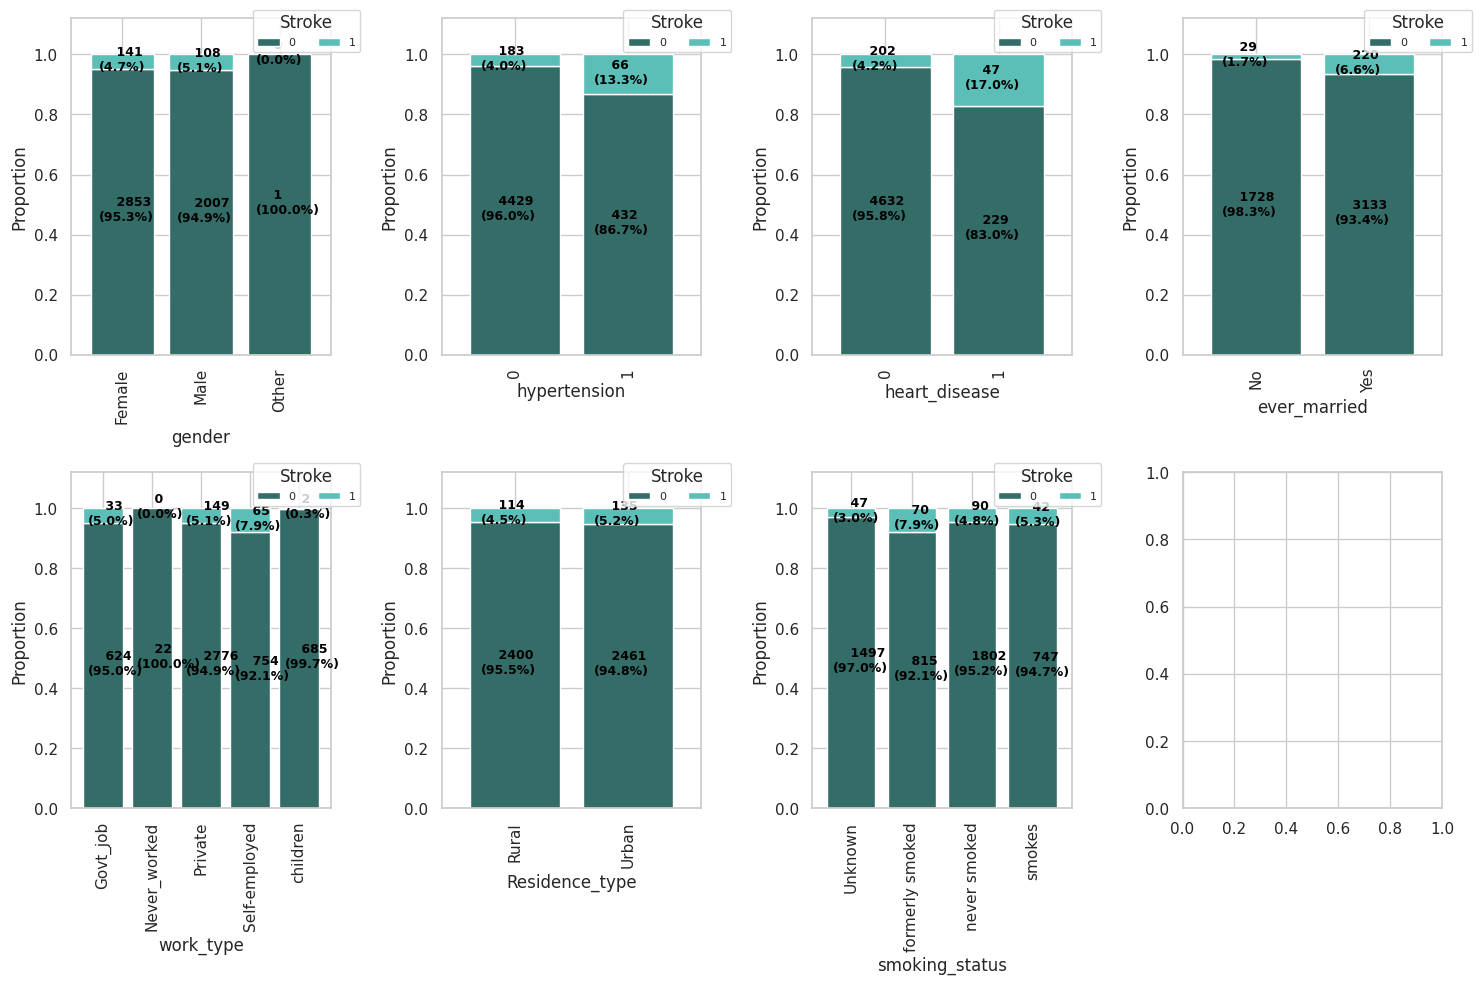

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

x_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
y_col = 'stroke'

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

for i, col in enumerate(x_cols):
    # Create a cross tabulation showing the proportion of the target variable for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df[y_col])
    cross_tab_prop = cross_tab.div(cross_tab.sum(1).astype(float), axis=0)  # Normalize the data
    
    # Define colormap
    cmp = ListedColormap(['#346c68', '#5bbeb7'])
    
    # Plot stacked bar charts
    x, y = i // 4, i % 4
    cross_tab_prop.plot(kind='bar', stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', ax=axes[x, y])
    
    # Add labels and counts to the bars
    for idx, val in enumerate(cross_tab_prop.index.values):
        for proportion, count, y_location in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            axes[x, y].text(x=idx - 0.3, y=(y_location - proportion) + (proportion / 2) - 0.03,
                             s=f'    {count}\n({np.round(proportion * 100, 1)}%)',
                             color="black", fontsize=9, fontweight="bold")
    
    # Add legend
    axes[x, y].legend(title=y_col.capitalize(), loc=(0.7, 0.9), fontsize=8, ncol=2)
    
    # Set y limit
    axes[x, y].set_ylim([0, 1.12])

plt.tight_layout()
plt.show()

In [53]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

strokeG = df.loc[df['stroke']== 1].reset_index()

strokeG["male_age"]=strokeG[strokeG["gender"]=="Male"]["age"]
strokeG["female_age"]=strokeG[strokeG["gender"]=="Female"]["age"]
strokeG[["male_age","female_age"]].iplot(kind="histogram", bins=20, theme="white", title="Stroke Ages",
         xTitle='Ages', yTitle='Count')

KeyError: 'stroke'

In [25]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


check for outliers here and fix them

detecting

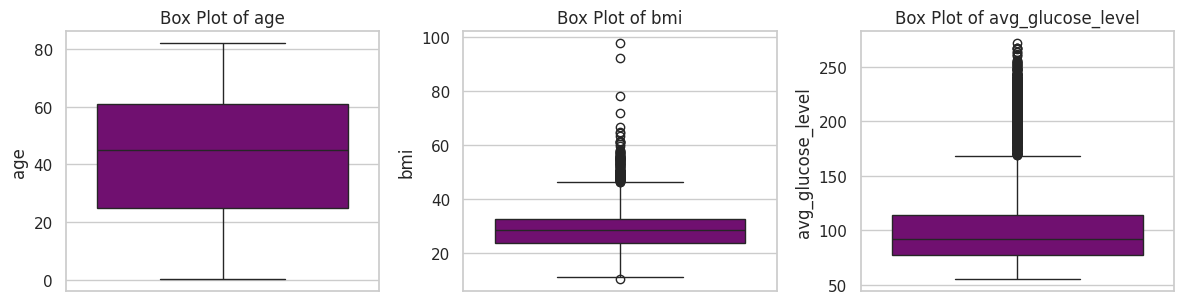

In [26]:
import seaborn as sns

numeric_variables = ['age', 'bmi', 'avg_glucose_level']

# Set the size of the plot grid
plt.figure(figsize=(12, 6))

# Create Box Plots for Outlier Detection
for i, numeric_var in enumerate(numeric_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[numeric_var], color='purple')
    plt.title(f'Box Plot of {numeric_var}')
    plt.ylabel(numeric_var)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

fixing

Shape after removing outliers: (4390, 12)


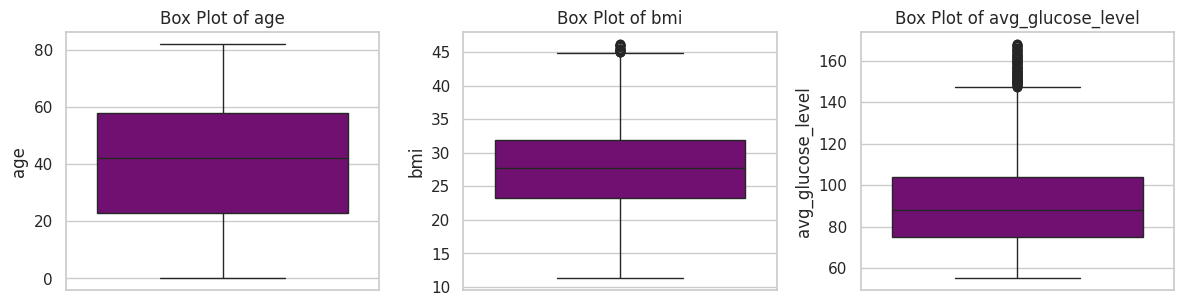

In [27]:
columns_to_check = ['bmi', 'avg_glucose_level']

# Loop through each column and remove outliers using IQR method
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Get boolean array indicating the presence of outliers for the current column
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    
    # Remove rows containing outliers for the current column
    df = df[~outliers]

# Verify the changes
print("Shape after removing outliers:", df.shape)
numeric_variables = ['age', 'bmi', 'avg_glucose_level']

# Set the size of the plot grid
plt.figure(figsize=(12, 6))

# Create Box Plots for Outlier Detection
for i, numeric_var in enumerate(numeric_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[numeric_var], color='purple')
    plt.title(f'Box Plot of {numeric_var}')
    plt.ylabel(numeric_var)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [28]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['ever_married']= label_encoder.fit_transform(df['ever_married'])
df['work_type']= label_encoder.fit_transform(df['work_type'])
df['Residence_type']=label_encoder.fit_transform(df['Residence_type'])
df['smoking_status']=label_encoder.fit_transform(df['smoking_status'])
df['gender']=label_encoder.fit_transform(df['gender'])

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,27419,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,60491,0,78.0,0,0,1,2,1,58.57,24.200000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [29]:
df = df.drop_duplicates()

Correlation Map

                         id    gender       age  hypertension  heart_disease  \
id                 1.000000  0.003134  0.013571      0.014426      -0.000279   
gender             0.003134  1.000000 -0.047553      0.019866       0.089272   
age                0.013571 -0.047553  1.000000      0.252344       0.239817   
hypertension       0.014426  0.019866  0.252344      1.000000       0.090573   
heart_disease     -0.000279  0.089272  0.239817      0.090573       1.000000   
ever_married       0.018626 -0.045858  0.685664      0.150405       0.106211   
work_type         -0.022498  0.067000 -0.390007     -0.058364      -0.028129   
Residence_type     0.005399 -0.005042  0.010756     -0.009601      -0.012522   
avg_glucose_level  0.024572  0.032221 -0.026012      0.002433      -0.000535   
bmi                0.018127 -0.002188  0.377089      0.150011       0.055670   
smoking_status     0.014140 -0.055580  0.287680      0.115575       0.055791   
stroke             0.000493 -0.001682  0

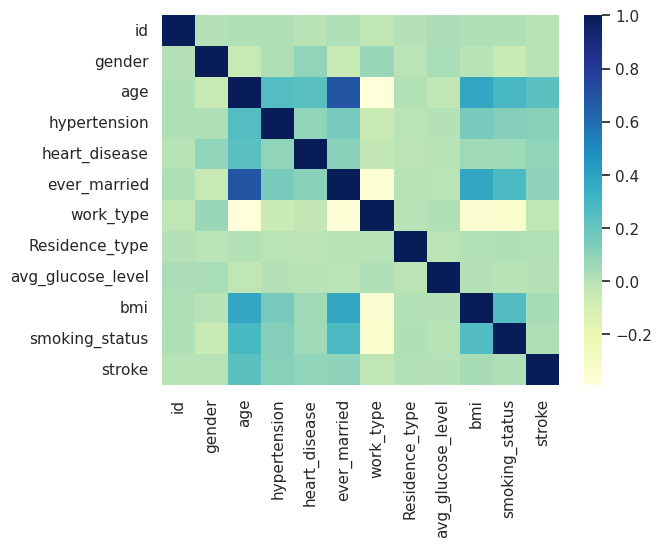

In [30]:
import matplotlib.pyplot as mp
import seaborn as sns
data = df

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=False)

# displaying heatmap
mp.show()

In [31]:
df.stroke.value_counts()

stroke
0    4225
1     165
Name: count, dtype: int64

Data is imbalanced

fix 1 oversampling  (just have to use df_test_over instead of df)

In [32]:
count_class_0, count_class_1 = df.stroke.value_counts()

df_class_0 = df[df['stroke'] == 0]
df_class_1 = df[df['stroke'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.stroke.value_counts())

Random over-sampling:
stroke
0    4225
1    4225
Name: count, dtype: int64


In [33]:
df = df.drop('id', axis='columns')

In [34]:
Y = df["stroke"]
X = df.drop('stroke', axis='columns')

Below is the fix 2 of oversampling SMOTE (better than oversampling) use X_sm and y_sm instead

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, Y)

y_sm.value_counts()

stroke
1    4225
0    4225
Name: count, dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sm)
X_scaled

array([[ 1.50334019,  1.1626217 , -0.24730114, ...,  0.62028151,
         0.77116358,  0.7721338 ],
       [ 1.50334019,  0.89907192,  4.04365297, ..., -0.92851272,
        -0.15562597,  0.7721338 ],
       [-0.66444558,  0.6794471 , -0.24730114, ...,  0.12188359,
        -0.99155379,  0.7721338 ],
       ...,
       [-0.66444558,  0.72143246, -0.24730114, ..., -0.65505647,
        -0.67953164, -0.25003926],
       [-0.66444558,  0.67329368,  4.04365297, ..., -0.79245912,
         1.37182596,  0.7721338 ],
       [-0.66444558,  1.06745179, -0.24730114, ...,  0.77447884,
         0.44298574, -0.25003926]])

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_sm, test_size=0.30, shuffle=True, random_state=10, stratify=y_sm)

here we used stratify=Y because there is imbalance so that xtrain and xtest both are balanced when samples divided among them

NOTE X and Y have been interchanged from AKpython

In [38]:
y_train.value_counts()

stroke
0    2958
1    2957
Name: count, dtype: int64

MODELS EVALUATION

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': range(2, 10),
            'min_samples_split': range(2, 20),
            'criterion': ['gini', 'entropy']
        }
    }
}



scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_test, y_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.876529,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.899408,{'n_estimators': 10}
2,logistic_regression,0.803550,{'C': 5}
3,decision_tree,0.867061,"{'criterion': 'gini', 'max_depth': 9, 'min_sam..."


Decision Tree Classifier    (Note can also use bagged DecisionTreeClassifier)

In [41]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier(max_depth=5)
clf1.fit(x_train, y_train)
score_normal_1 = clf1.score(x_test, y_test)
print(score_normal_1)

scores_cross_1 = cross_val_score(DecisionTreeClassifier(), X_scaled, y_sm, cv=5)
print(scores_cross_1.mean())



bag_model_1 = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=0), 
    n_estimators=100, 
    max_samples=0.9, 
    oob_score=True,
    random_state=0
)

scores_bagged_1 = cross_val_score(bag_model_1, X_scaled, y_sm, cv=5)
print(scores_bagged_1.mean())

0.8209072978303747
0.9223668639053255
0.9534911242603551


SVM  (do it for poly and rf as well using grid cross cv and also try bagging them)

In [51]:
from sklearn.svm import SVC

clf2 = SVC(kernel="rbf", C=20)
clf2.fit(x_train, y_train)
score_normal_2 = clf2.score(x_test, y_test)
print(score_normal_2)

scores_cross_2 = cross_val_score(SVC(kernel="rbf", C=20), X_scaled, y_sm, cv=5)
print(scores_cross_2.mean())


bag_model_2 = BaggingClassifier(estimator=SVC(kernel="rbf", C=20), n_estimators=30, max_samples=0.8, random_state=0)
scores_bagged_2 = cross_val_score(bag_model_2, X_scaled, y_sm, cv=5)
print(scores_bagged_2.mean())

0.9013806706114399
0.9034319526627218
0.9007100591715977


KNeighbors Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

clf3 = KNeighborsClassifier(3)
clf3.fit(x_train, y_train)
score_normal_3 = clf3.score(x_test, y_test)
print(score_normal_3)

scores_cross_3 = cross_val_score(KNeighborsClassifier(), X_scaled, y_sm, cv=5)
print(scores_cross_3.mean())


bag_model_3 = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=100, max_samples=0.8, random_state=0)
scores_bagged_3 = cross_val_score(bag_model_3, X_scaled, y_sm, cv=5)
print(scores_bagged_3.mean())

0.9096646942800789
0.898698224852071
0.8919526627218934


Naive Bayes Classifier

In [44]:
from sklearn.naive_bayes import GaussianNB

clf4 = GaussianNB()
clf4.fit(x_train, y_train)
score_normal_4 = clf4.score(x_test, y_test)
print(score_normal_4)

scores_cross_4 = cross_val_score(GaussianNB(), X_scaled, y_sm, cv=5)
print(scores_cross_4.mean())


bag_model_4 = BaggingClassifier(estimator=GaussianNB(), n_estimators=100, max_samples=0.8, random_state=0)
scores_bagged_4 = cross_val_score(bag_model_4, X_scaled, y_sm, cv=5)
print(scores_bagged_4.mean())

0.7925049309664695
0.799171597633136


0.8011834319526627


MLPClassifier

In [45]:
from sklearn.neural_network import MLPClassifier

clf5 = MLPClassifier(alpha=1, max_iter=1000)
clf5.fit(x_train, y_train)
score_normal_5 = clf5.score(x_test, y_test)
print(score_normal_5)

scores_cross_5 = cross_val_score(MLPClassifier(alpha=1, max_iter=1000), X_scaled, y_sm, cv=5)
print(scores_cross_5.mean())


bag_model_5 = BaggingClassifier(estimator=MLPClassifier(alpha=1, max_iter=1000), n_estimators=8, max_samples=0.8, random_state=0)
scores_bagged_5 = cross_val_score(bag_model_5, X_scaled, y_sm, cv=5)
print(scores_bagged_5.mean())

0.84930966469428
0.857396449704142
0.8397633136094674


SGDClassifier

In [46]:
from sklearn.linear_model import SGDClassifier

clf6 = SGDClassifier(loss="hinge", penalty="l2")
clf6.fit(x_train, y_train)
score_normal_6 = clf6.score(x_test, y_test)
print(score_normal_6)

scores_cross_6 = cross_val_score(SGDClassifier(), X_scaled, y_sm, cv=5)
print(scores_cross_6.mean())


bag_model_6 = BaggingClassifier(estimator=SGDClassifier(), n_estimators=100, max_samples=0.8, random_state=0)
scores_bagged_6 = cross_val_score(bag_model_6, X_scaled, y_sm, cv=5)
print(scores_bagged_6.mean())

0.7715976331360946
0.7892307692307693


0.8100591715976332


Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

clf7 = LogisticRegression(max_iter = 1000)
clf7.fit(x_train, y_train)
score_normal_7 = clf7.score(x_test, y_test)
print(score_normal_7)

scores_cross_7 = cross_val_score(LogisticRegression(), X_scaled, y_sm, cv=5)
print(scores_cross_7.mean())


bag_model_7 = BaggingClassifier(estimator=LogisticRegression(), n_estimators=100, max_samples=0.8, random_state=0)
scores_bagged_7 = cross_val_score(bag_model_7, X_scaled, y_sm, cv=5)
print(scores_bagged_7.mean())

0.798422090729783
0.809585798816568


0.8093491124260355


RandomForest

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf8 = RandomForestClassifier(max_depth=2, random_state=0)
clf8.fit(x_train, y_train)
y_pred=clf8.predict(x_test)

print(clf8.score(x_test,y_test))

scores_cross_8 = cross_val_score(RandomForestClassifier(), X_scaled, y_sm, cv=5)
print(scores_cross_8.mean())

0.7794871794871795
0.952189349112426


In [49]:
from sklearn.ensemble import VotingClassifier


classifiers=[['Naive Bayes :', GaussianNB()],
             ['LogisticRegression :', LogisticRegression(max_iter = 1000)], 
             ['DecisionTree :',DecisionTreeClassifier()]]

vot_hard = VotingClassifier(estimators= classifiers, voting='hard')
vot_hard.fit(x_train, y_train)

vot_soft = VotingClassifier(estimators = classifiers, voting ='soft')
vot_soft.fit(x_train, y_train)

print(vot_hard.score(x_test, y_test))
print(vot_soft.score(x_test, y_test))

scores_cross_hard = cross_val_score(VotingClassifier(estimators = classifiers, voting ='hard'), X_scaled, y_sm, cv=5)
print(scores_cross_hard.mean())

scores_cross_soft = cross_val_score(VotingClassifier(estimators = classifiers, voting ='soft'), X_scaled, y_sm, cv=5)
print(scores_cross_soft.mean())

0.8544378698224852
0.8852071005917159


0.8635502958579881
0.892662721893491
